In [2]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
import numpy as np

In [3]:
matplotlib inline

[0.9807852804032304, (0.18023995550173702+0.07465783405034264j)]


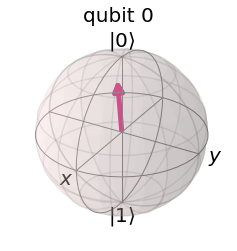

In [4]:
# Creating the initial state for the qbit. 
theta = np.pi*(7/8)
phi = np.pi*(1/8)
initial_state = [np.sin(theta/2), np.exp(phi*(0+1j))*np.cos(theta/2)]
print(initial_state)
plot_bloch_multivector(initial_state)

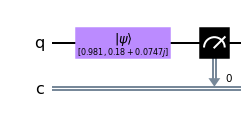

In [5]:
# Initial circuit
circuit = QuantumCircuit(1, 1)
circuit.initialize(initial_state, 0)
circuit.measure(0, 0)

circuit.draw(output='mpl')

In [6]:
simulator = Aer.get_backend('qasm_simulator')

{'0': 9590, '1': 410}


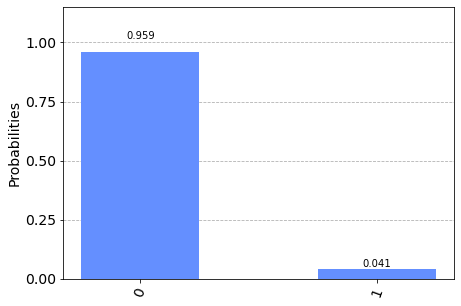

In [7]:
result = execute(circuit, backend = simulator, shots=10000).result()
counts = result.get_counts()

print(counts)
plot_histogram(counts)

In [8]:
n0 = counts.get('0')
n1 = counts.get('1')
p0 = n0/(n0+n1)
p1 = n1/(n0+n1)
print('theta is approximately ' + str(np.arcsin(np.sqrt(p0))*2)) # Equivalent: np.arccos(np.sqrt(p1))])
print('theta is approximately ' + str(np.arcsin(np.sqrt(p0))*2/np.pi) + '\u03C0 +- N\u03C0/2')

theta is approximately 2.7338038915202354
theta is approximately 0.8701968055586102π +- Nπ/2


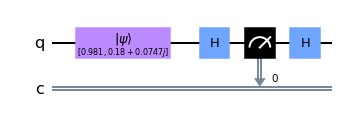

In [9]:
# New circuit using the H gate to swich from measuring z-axis to measuring x-axis
circuit = QuantumCircuit(1, 1)
circuit.initialize(initial_state, 0)
#circuit.rz(np.pi/4-theta, 0)
circuit.h(0)
circuit.measure(0, 0)
#circuit.rz(-theta, 0)
circuit.h(0)


circuit.draw(output='mpl')

{'0': 6809, '1': 3191}


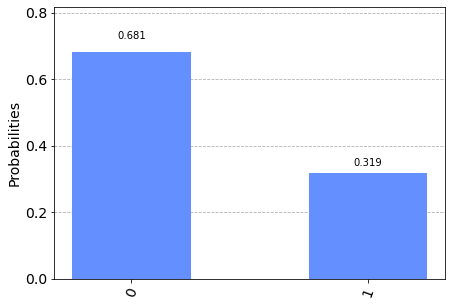

In [10]:
result = execute(circuit, backend = simulator, shots=10000).result()
counts = result.get_counts()

print(counts)
plot_histogram(counts)

In [13]:
n0 = counts.get('0')
n1 = counts.get('1')
p0 = n0/(n0+n1)
p1 = n1/(n0+n1)
print([p0, p1])
print(0.5*np.abs(np.sin(theta/2)+np.exp(phi*(0+1j))*np.cos(theta/2))**2) # = p0
print(0.5*np.abs(np.sin(theta/2)-np.exp(phi*(0+1j))*np.cos(theta/2))**2) # = p1

#print('phi is approximately ' + str(np.log((np.sqrt(2*p0)-np.sin(theta))/(np.cos(theta)))))
      # Equivalent: np.arccos(np.sqrt(p1))])
#print('phi is approximately ' + str(np.log((np.sqrt(2*p0)-np.sin(theta))/(np.cos(theta)))/np.pi) + '\u03C0')

[0.6809, 0.3191]
0.676776695296637
0.323223304703363
